In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df.head()

C:\Users\ragha\AppData\Local\Temp\ipykernel_24532\1117333770.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## Separating the patient's clinical data from the patient's genomic data.

In [3]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
genomic_data = df.loc[:, df.columns[31:]]
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


## Detecting Missing Values

In [5]:
#Finding missing data and the percentage of it in each column
total = genomic_data.isnull().sum().sort_values(ascending = False)
percent = (genomic_data.isnull().sum() / genomic_data.isnull().count()).sort_values(ascending=False)
missing_genomic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_genomic.head()

,total_null,percent_null
brca1,0,0.0
bche,0,0.0
cdkn2c,0,0.0
cyb5a,0,0.0
cyp11a1,0,0.0


In [6]:
#Finding missing data and the percentage of it in each column
total = clinic_data.isnull().sum().sort_values(ascending = False)
percent = (clinic_data.isnull().sum() / clinic_data.isnull().count()).sort_values(ascending=False)
missing_clinic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_clinic.head(14)

,total_null,percent_null
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [7]:
total = 0
for i in missing_clinic['total_null']:
    total += i
print(total)

1100


In [8]:
clinic_data.shape

(1904, 31)

## Filling the Missing Values

### Visualize the Columns w/ Missing Values


tumor_stage


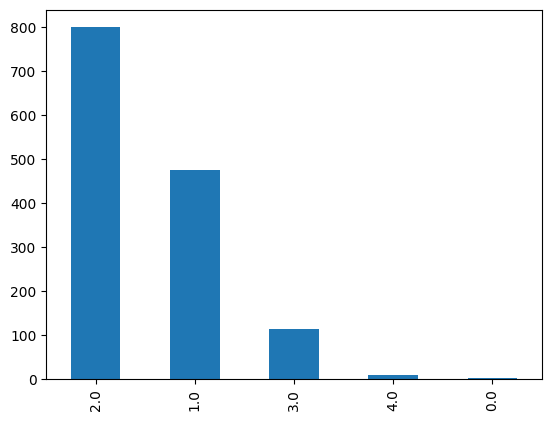

3-gene_classifier_subtype


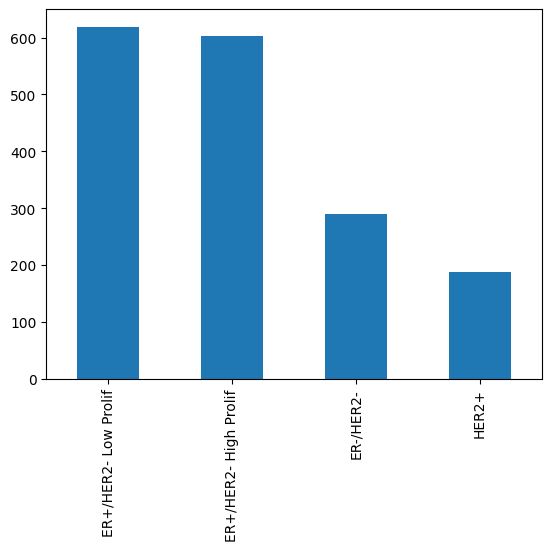

primary_tumor_laterality


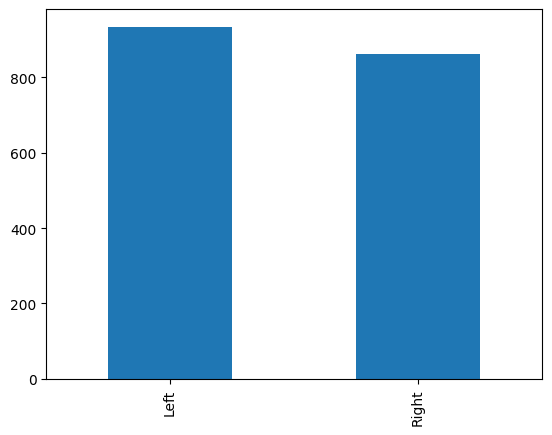

neoplasm_histologic_grade


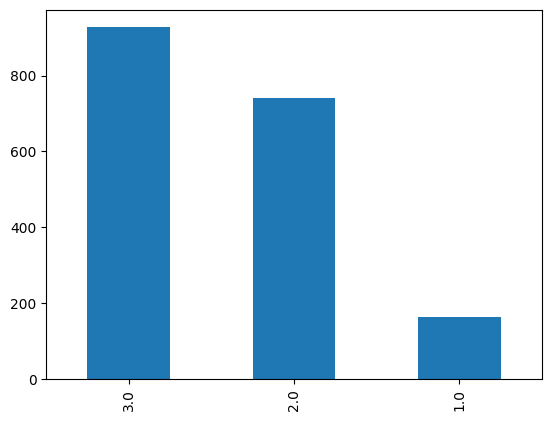

cellularity


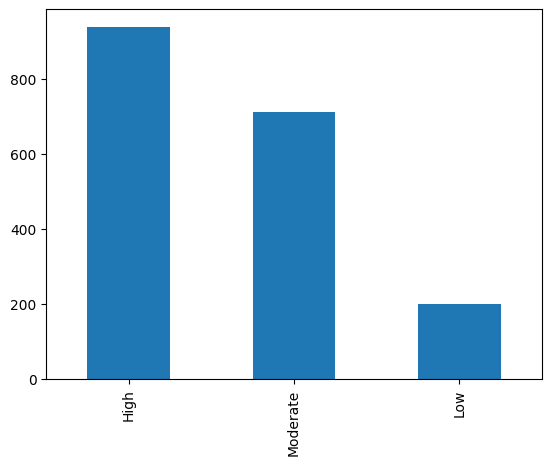

mutation_count


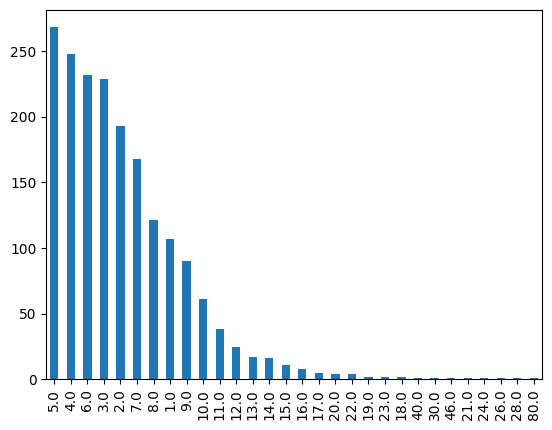

er_status_measured_by_ihc


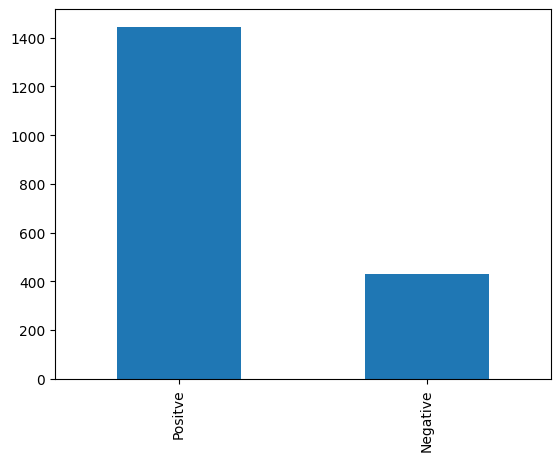

type_of_breast_surgery


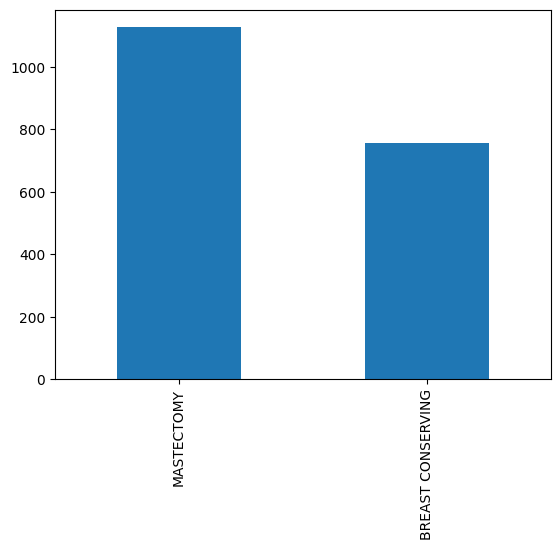

tumor_size


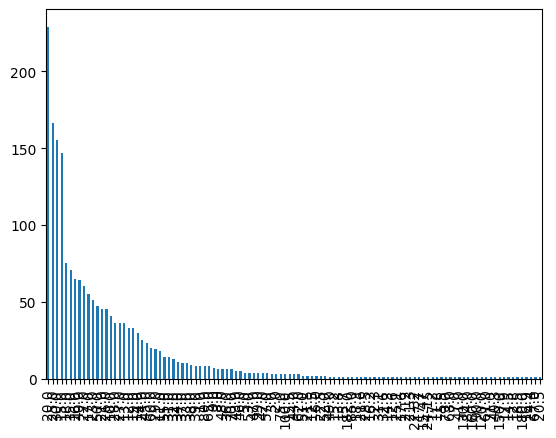

cancer_type_detailed


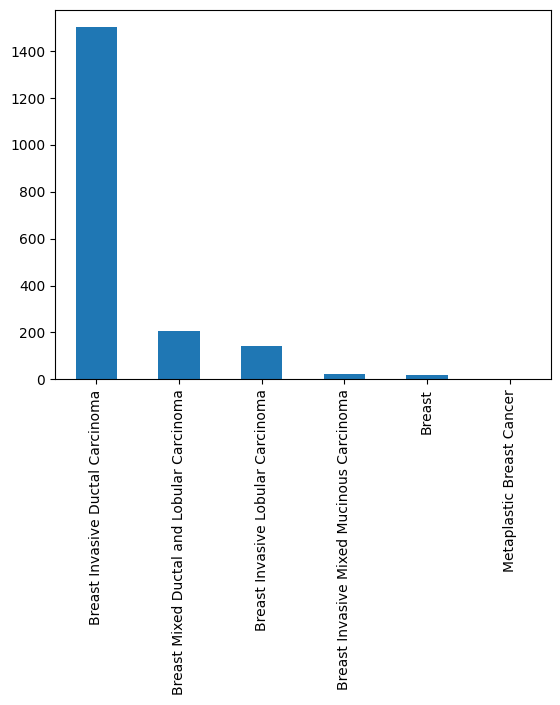

tumor_other_histologic_subtype


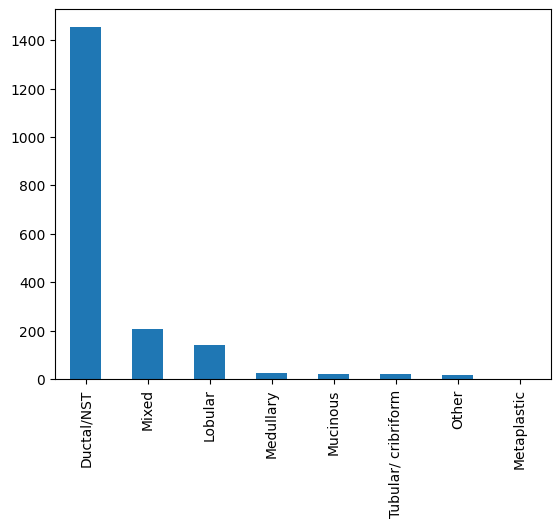

oncotree_code


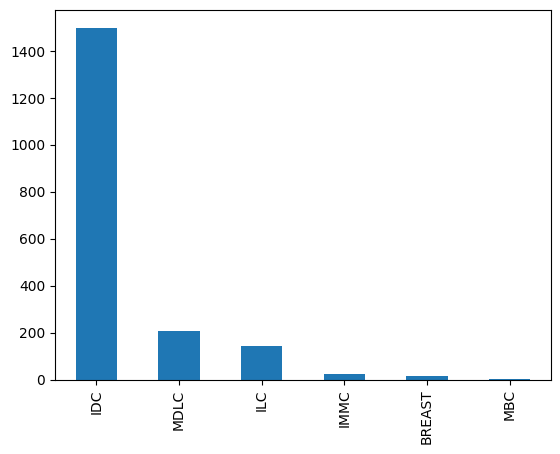

death_from_cancer


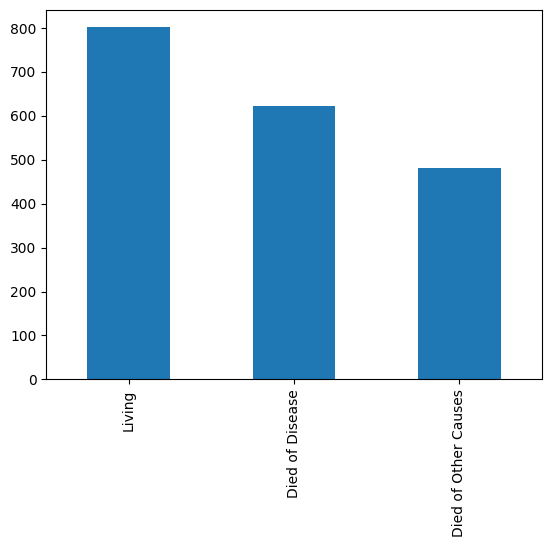

In [9]:
for missing_column in missing_clinic.index[:13]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)
    plt.show()

In [10]:
for column in missing_clinic.index[:13]:
    df[column].fillna(df[column].mode()[0], inplace=True)

#df = df.dropna()

In [11]:
df.isnull().sum().value_counts()

0    693
dtype: int64

In [12]:
df.shape

(1904, 693)

## Drop Columns & Value Counts & Interpreting Data

In [13]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [18]:
for i in df.columns:
    unique_values = df[i].unique()
    print(i)
    print(unique_values)

patient_id
[   0    2    5 ... 7297 7298 7299]
age_at_diagnosis
[75.65 43.19 48.87 ... 43.1  42.88 60.02]
type_of_breast_surgery
['MASTECTOMY' 'BREAST CONSERVING']
cancer_type
['Breast Cancer' 'Breast Sarcoma']
cancer_type_detailed
['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast'
 'Metaplastic Breast Cancer']
cellularity
['High' 'Moderate' 'Low']
chemotherapy
[0 1]
pam50_+_claudin-low_subtype
['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']
cohort
[1. 2. 3. 5. 4.]
er_status_measured_by_ihc
['Positve' 'Negative']
er_status
['Positive' 'Negative']
neoplasm_histologic_grade
[3. 2. 1.]
her2_status_measured_by_snp6
['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']
her2_status
['Negative' 'Positive']
tumor_other_histologic_subtype
['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribriform' 'Mucinous'
 'Medullary' 'Other' 'Metaplastic']
hormone_therapy
[1 0]
inferred_menopausal_state


In [127]:
# death_from_cancer, gene_classifier_subtype, pr_status, oncotree_code, integrative_cluster, inferred_menopausal_state,
# tumor_other_histologic_subtype, her2_status, her2_status_measured_by_snp6, er_status, er_status_measured_by_ihc,
# pam50_+_claudin-low_subtype, cellularity, type_of_breast_surgery, cancer_type_detailed

# Ordinal (Label)
# cellularity, cancer_type_detailed, type_of_breast_surgery, her2_status_measured_by_snp6, pam50_+_claudin-low_subtype,
# her2_status_measured_by_snp6, tumor_other_histologic_subtype, integrative_cluster, 3-gene_classifier_subtype,
# death_from_cancer

# Nominal (One Hot)
# er_status_measured_by_ihc, er_status, her2_status, inferred_menopausal_state, primary_tumor_laterality, pr_status,
# oncotree_code

## Label Encoding (Ordinal)

In [19]:
ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,claudin-low,NEUTRAL,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,NEUTRAL,LumA,NEUTRAL,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [20]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,2,6,2,0,4,2,2
1,0,1,0,2,2,2,0,4,0,2
2,0,1,1,2,3,2,0,3,1,0
3,2,4,1,2,3,2,4,10,1,2
4,0,4,1,2,3,2,4,10,0,0


## One-Hot Encoding (Nominal)

In [21]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [22]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


### Add ordinal_df

In [23]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,1,2,6,2,0,4,2,2
1,2,43.19,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,0,2,2,2,0,4,0,2
2,5,48.87,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,0,1,1,2,3,2,0,3,1,0
3,6,47.68,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,2,4,1,2,3,2,4,10,1,2
4,8,76.97,Breast Cancer,1,1.0,Positve,Positive,3.0,Negative,1,...,0,4,1,2,3,2,4,10,0,0


### Add nominal_df

In [24]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [27]:
df.isnull().sum().sum()

0

### Rounding Age of Patients

In [28]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [29]:
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


### Drop Some Columns

In [30]:
df['cancer_type'].value_counts()
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


In [31]:
df.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [32]:
df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


## Find Outliers

In [33]:
#new clinical data
new_clinic_data = df[df.columns[:25]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


In [34]:
new_clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1904 non-null   float64
 1   chemotherapy                   1904 non-null   int64  
 2   cohort                         1904 non-null   float64
 3   neoplasm_histologic_grade      1904 non-null   float64
 4   hormone_therapy                1904 non-null   int64  
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   mutation_count                 1904 non-null   float64
 7   nottingham_prognostic_index    1904 non-null   float64
 8   overall_survival_months        1904 non-null   float64
 9   overall_survival               1904 non-null   int64  
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1904 non-null   float64
 12  tumor_stage                    1904 non-null   f

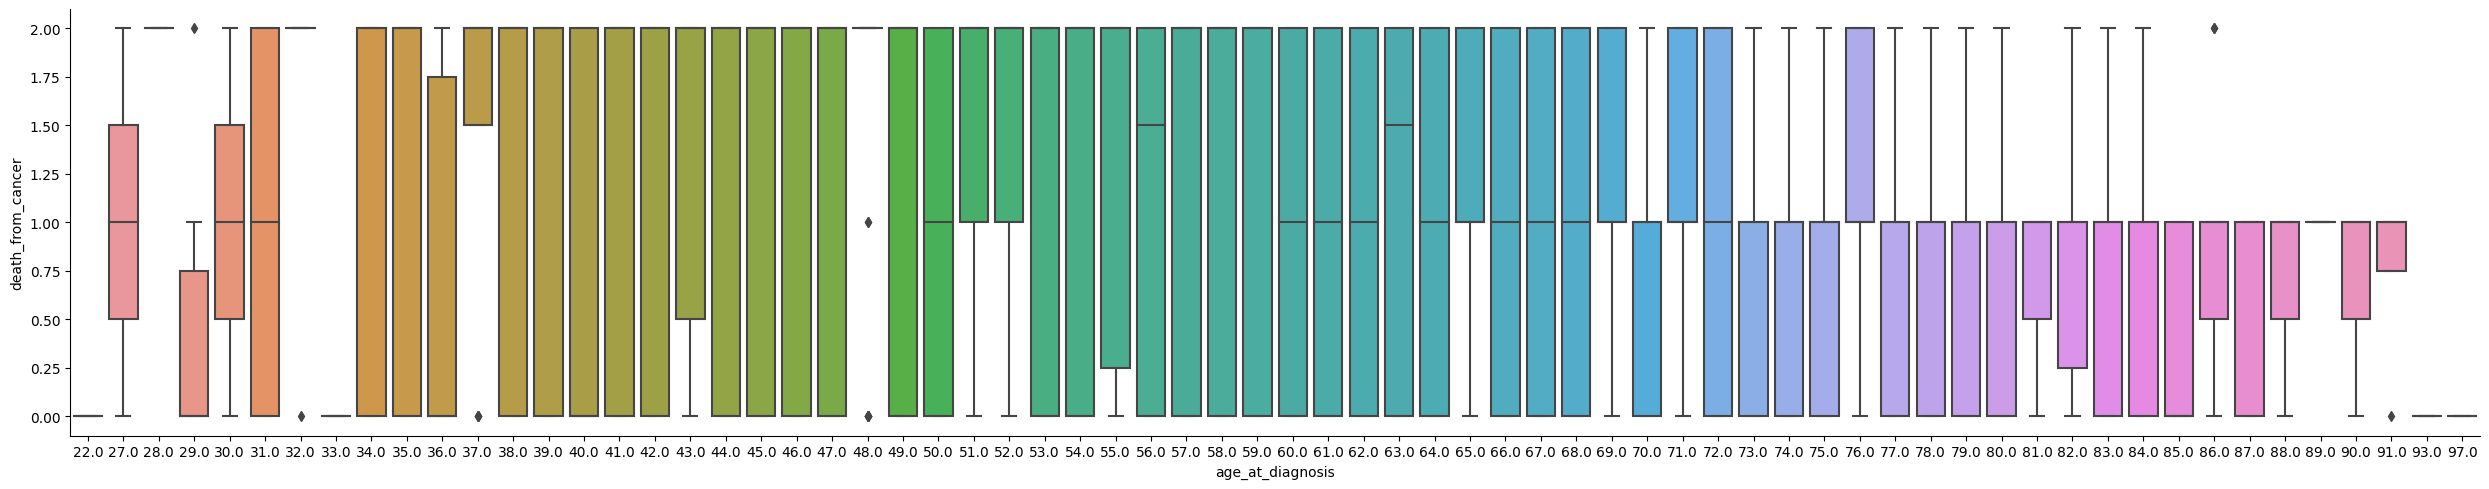

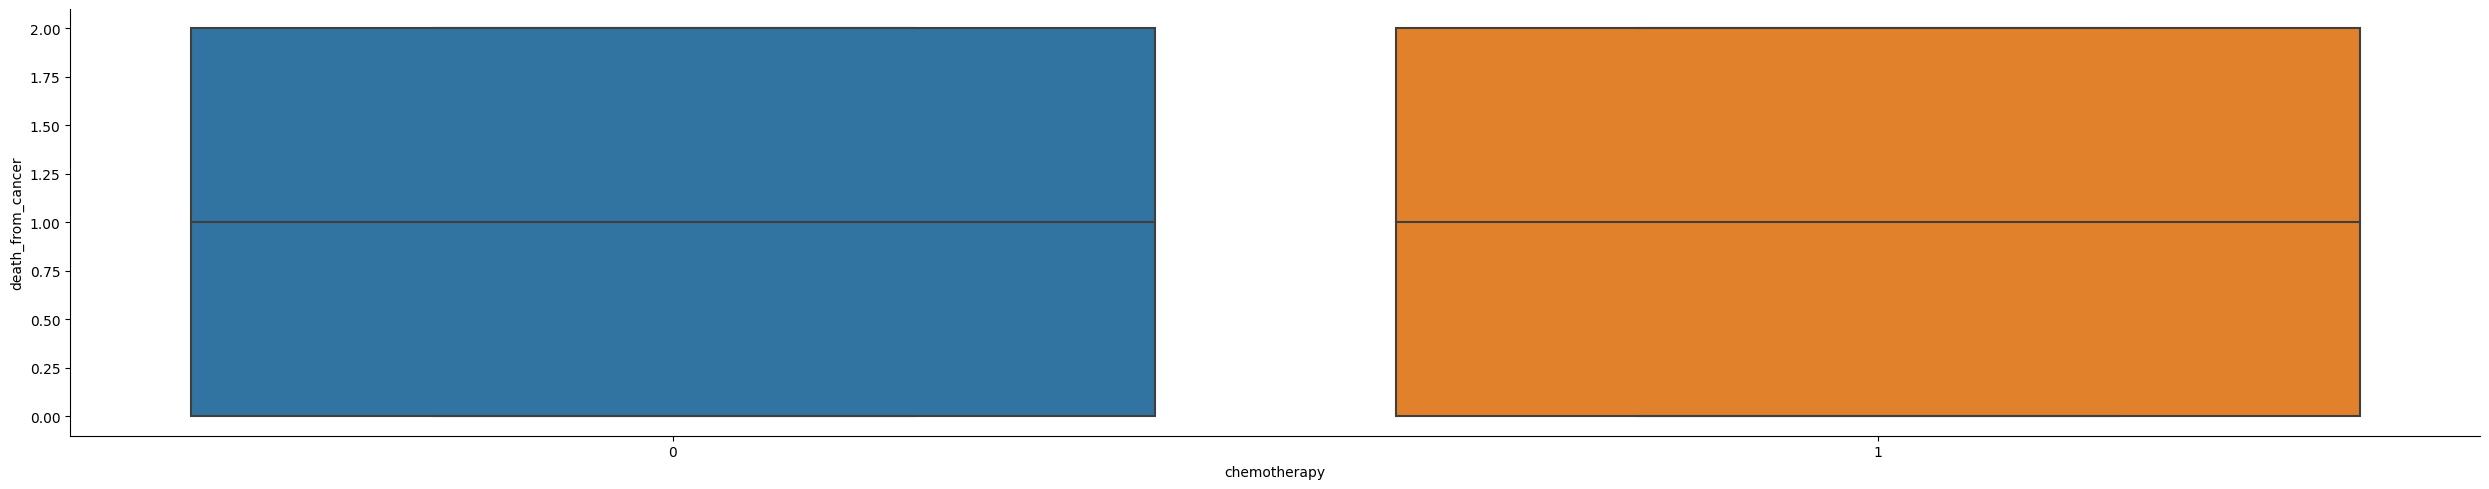

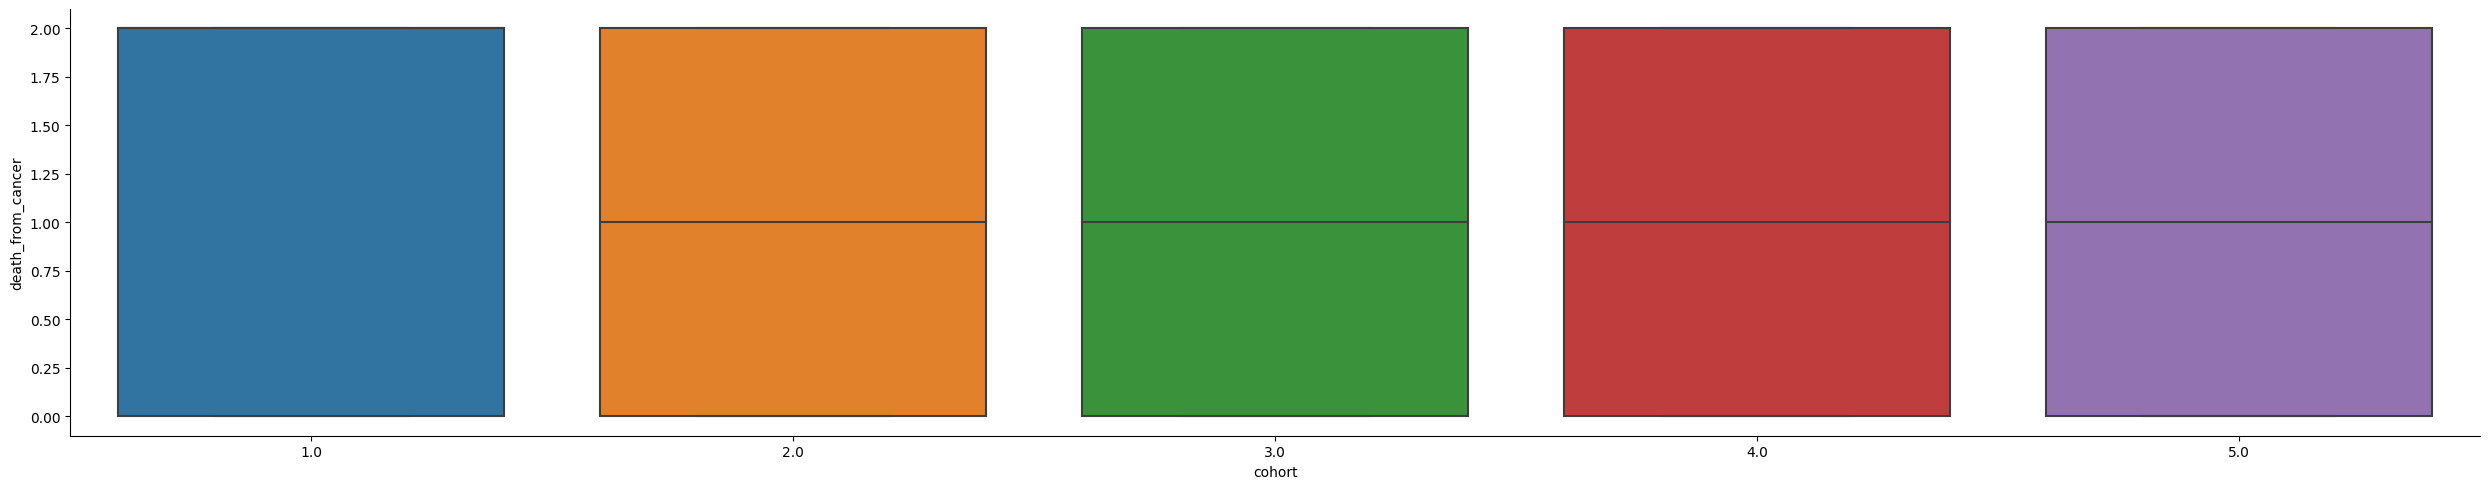

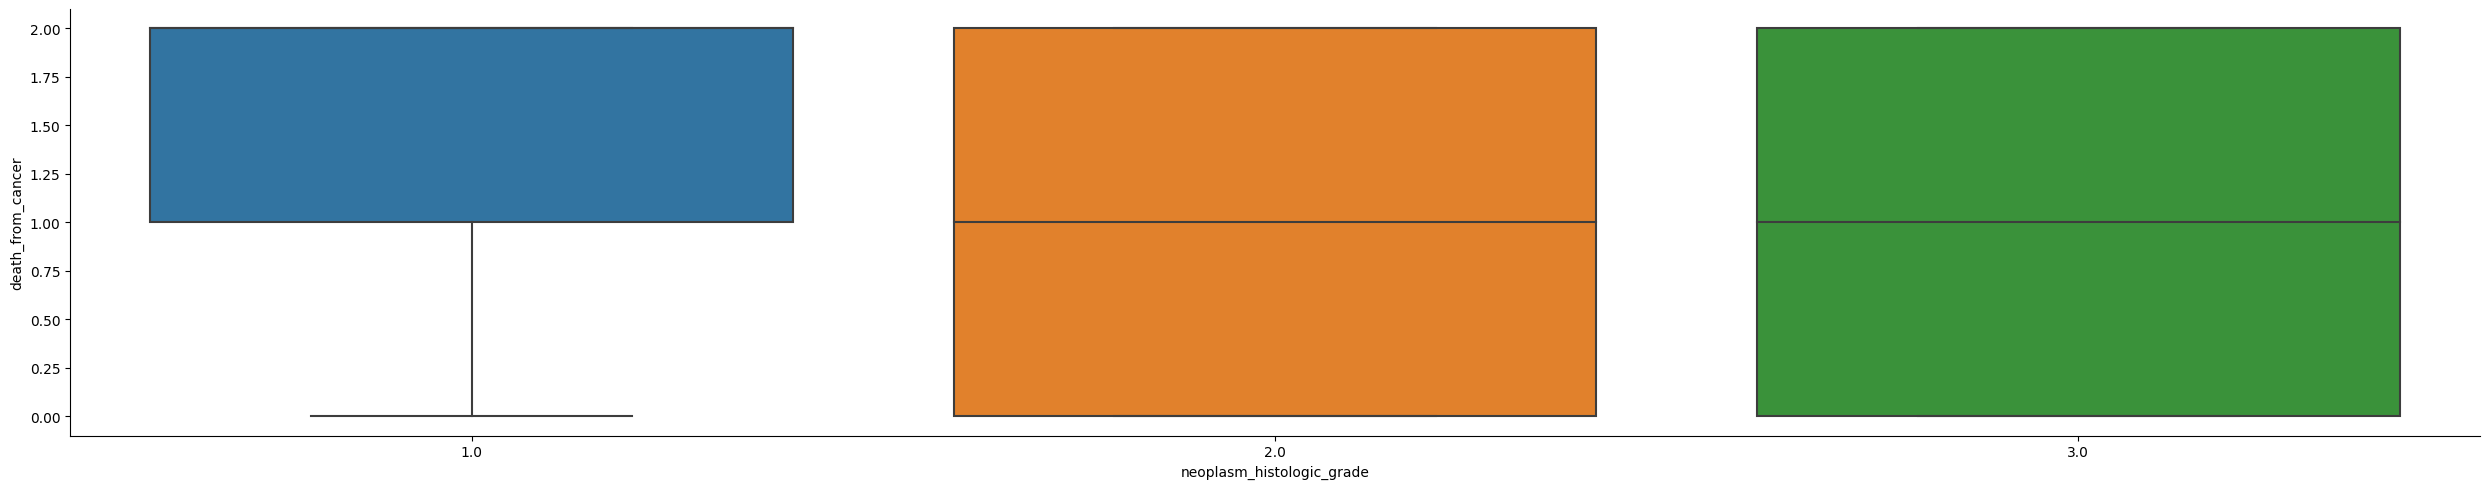

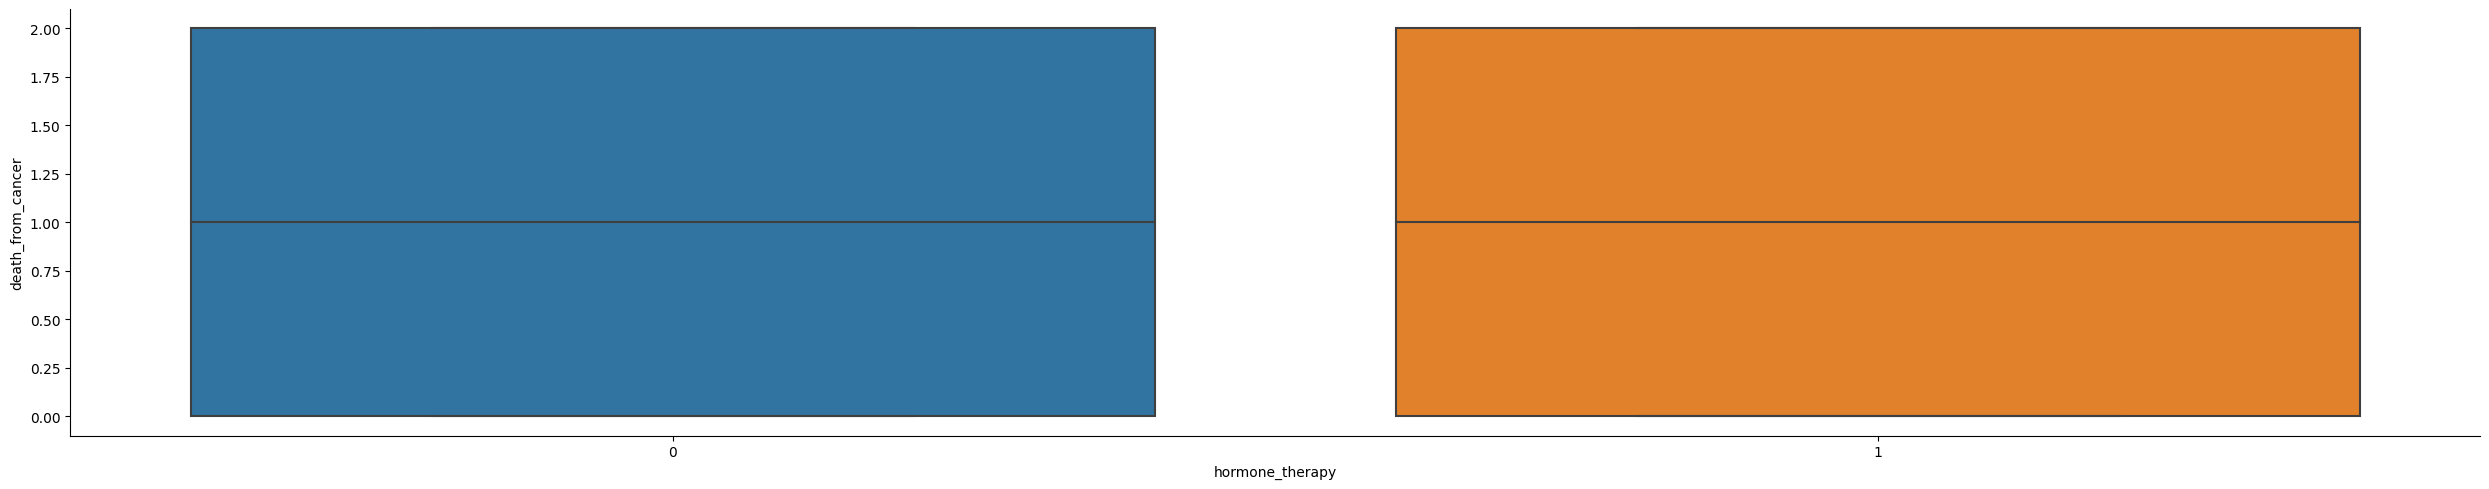

In [35]:
for i in df[df.columns[:5]]:
    sns.catplot(x=i, y='death_from_cancer', data=df, height=5, aspect=5, kind='box')
    plt.show()

### Correlation Matrix between Numerical Clinical Data

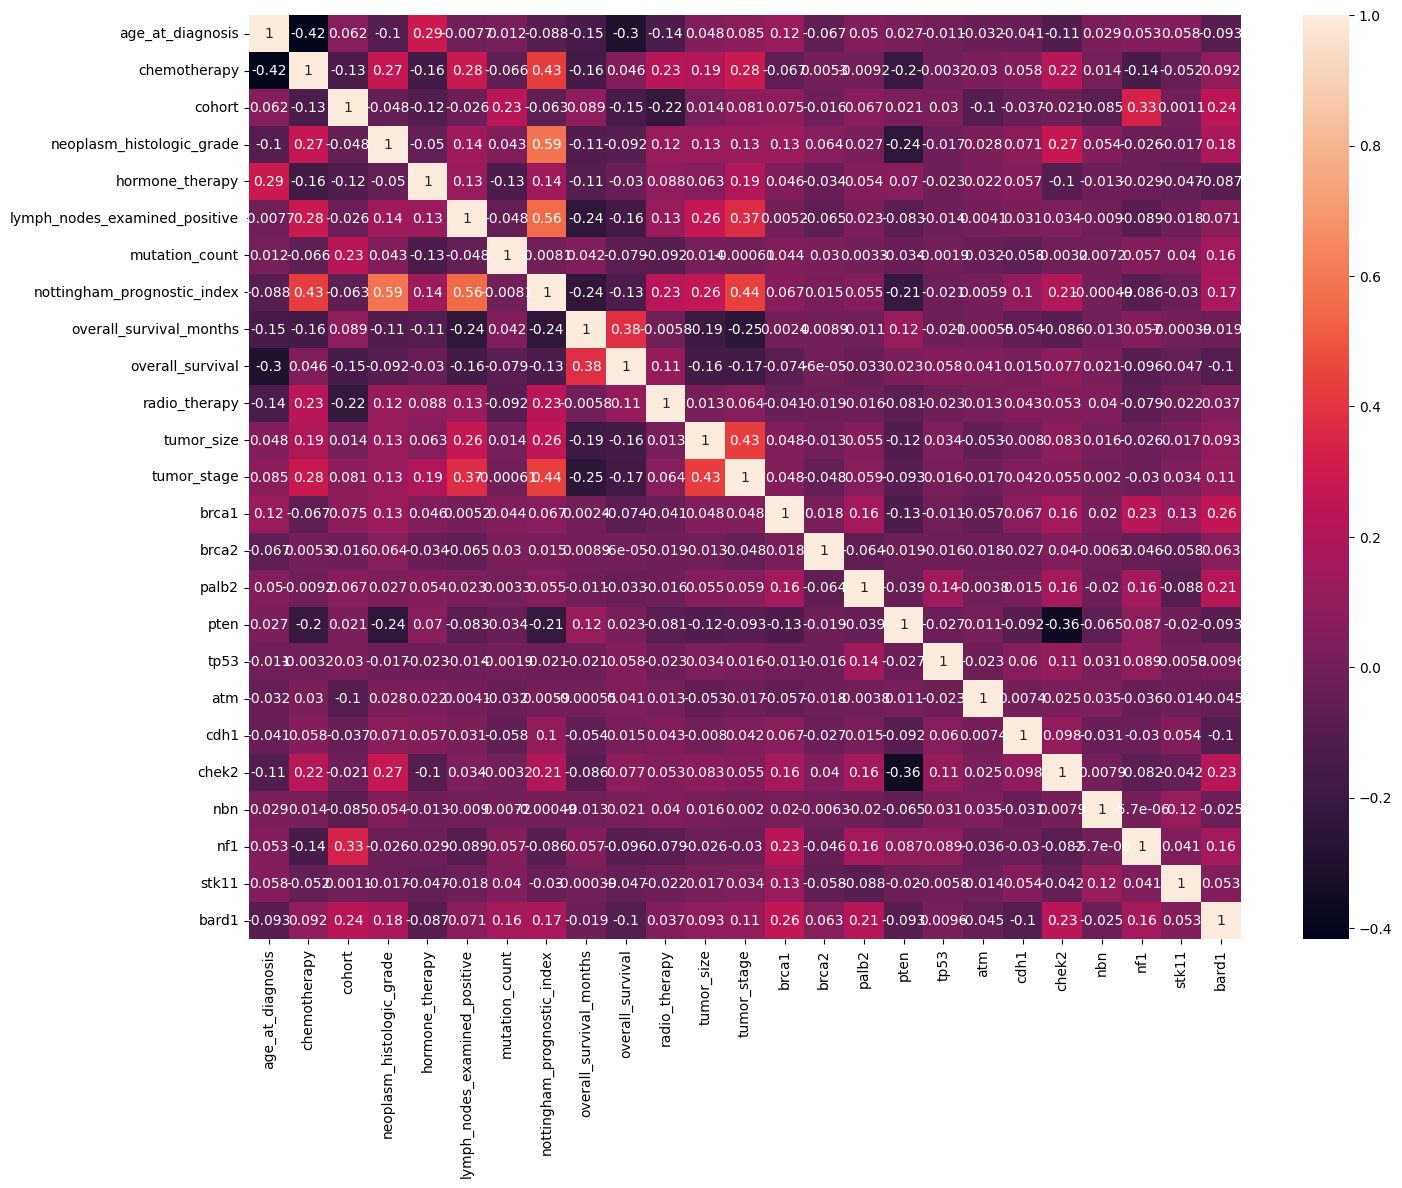

In [36]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Update Data Set

In [37]:
new_clinic_data.shape

(1904, 25)

In [38]:
new_df = df.drop(new_clinic_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinic_data)
new_df.isnull().sum().sum()

0

## Treatment Types and Survivals

In [39]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

In [40]:
died = new_df[new_df['overall_survival']==0]
survived = new_df[new_df['overall_survival']==1]

In [44]:
new_df[treatments]

,chemotherapy,hormone_therapy,radio_therapy
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1
...,...,...,...
1899,0,1,1
1900,0,0,1
1901,0,1,1
1902,0,1,0


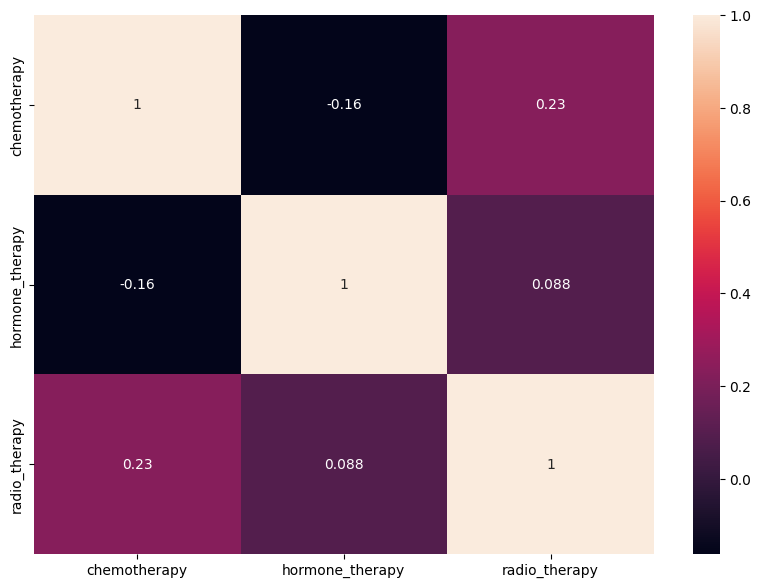

In [45]:
corr_matrix = new_df[treatments].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


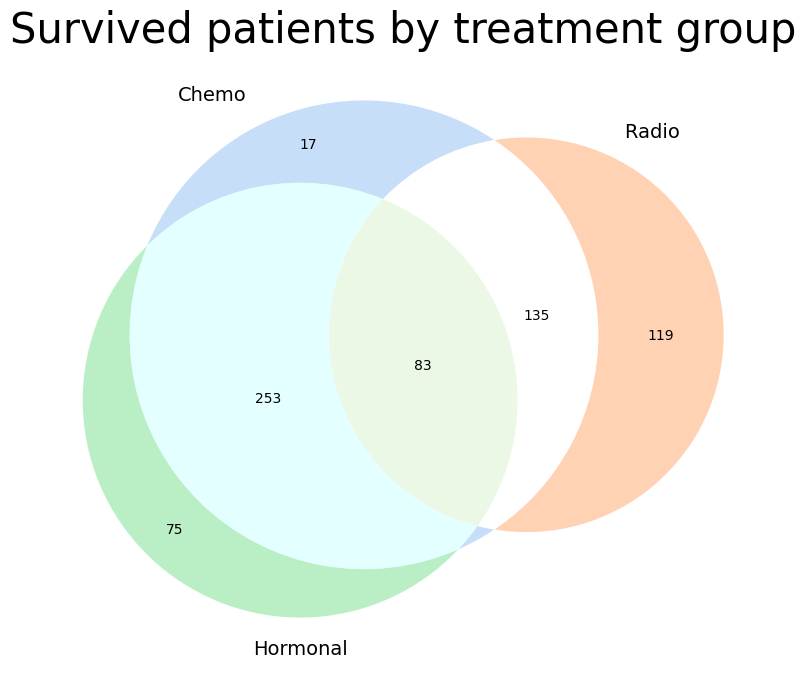

In [47]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(10,8))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Survived patients by treatment group", size=30)
plt.show()

### Statistical Summaries

In [48]:
# Statistical summary for categorical clinical attributes 
new_df[new_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mlh1,1904.0,-1.050420e-06,1.000262,-6.4387,-0.568725,0.09835,0.654075,3.2935
msh2,1904.0,5.252101e-07,1.000262,-2.0740,-0.613475,-0.12845,0.413250,9.5864
msh6,1904.0,-5.252101e-08,1.000262,-4.0556,-0.675075,-0.10295,0.560850,5.4028
pms2,1904.0,-3.676471e-07,1.000264,-3.0320,-0.664625,-0.03055,0.586000,6.2231
epcam,1904.0,1.492737e-17,1.000263,-2.1659,-0.686000,-0.14945,0.525500,6.9539
...,...,...,...,...,...,...,...,...
chek2,1904.0,7.463684e-18,1.000262,-2.6887,-0.738550,-0.13110,0.543125,4.5382
nbn,1904.0,-3.676471e-07,1.000263,-3.6898,-0.666775,-0.01445,0.638725,5.3713
nf1,1904.0,-1.155462e-06,1.000262,-2.9686,-0.683925,-0.05480,0.668925,6.1786
stk11,1904.0,-4.726891e-07,1.000263,-3.0602,-0.683825,-0.05785,0.536275,4.8501


## Genomic Data

In [49]:
genomic_data = new_df.loc[:, new_df.dtypes == np.object]
genomic_data.head()

C:\Users\ragha\AppData\Local\Temp\ipykernel_24532\3596077361.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  genomic_data = new_df.loc[:, new_df.dtypes == np.object]


,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
genomic_col = genomic_data.columns
for col in genomic_col:
    new_df.loc[new_df[col] != '0', col] = 1
    new_df.loc[new_df[col] == '0', col] = 0
new_df.head()

,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


In [51]:
new_df[genomic_col].astype('int64')

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## MinMax Scaler

In [53]:
from sklearn.preprocessing import MinMaxScaler

x = new_df.loc[:, new_df.columns != 'death_from_cancer'].values
x = MinMaxScaler().fit_transform(x) # normalizing the features
x

array([[0.61181439, 0.1136925 , 0.25264315, ..., 0.23075914, 0.33257904,
        0.29369242],
       [0.78762253, 0.24314775, 0.44803561, ..., 0.03965148, 0.45158844,
        0.53923931],
       [0.47755903, 0.44333814, 0.49864671, ..., 0.20094674, 0.4167225 ,
        0.44299551],
       ...,
       [0.76387662, 0.23789921, 0.57982323, ..., 0.29688867, 0.21000468,
        0.45110639],
       [0.76805861, 0.24630373, 0.49291635, ..., 0.11171725, 0.42702552,
        0.42688401],
       [0.71995027, 0.21721382, 0.5189144 , ..., 0.26299851, 0.45534303,
        0.40985904]])

In [54]:
normalised_df = pd.DataFrame(x)
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
0,0.611814,0.113692,0.252643,0.314097,0.196693,0.340103,0.227145,0.598489,0.399801,0.215459,...,0.307003,0.803884,0.418195,0.617925,0.546577,0.389558,0.314940,0.230759,0.332579,0.293692
1,0.787623,0.243148,0.448036,0.436775,0.298899,0.372600,0.214084,0.482847,0.160008,0.411453,...,0.352149,0.703436,0.364437,0.415257,0.762149,0.482198,0.467018,0.039651,0.451588,0.539239
2,0.477559,0.443338,0.498647,0.609902,0.517687,0.419937,0.201976,0.565726,0.675340,0.392732,...,0.510689,0.609585,0.442372,0.441792,0.726410,0.429977,0.362737,0.200947,0.416723,0.442996
3,0.518711,0.596360,0.435285,0.645417,0.688831,0.384607,0.129512,0.537359,0.694940,0.270966,...,0.302836,0.715116,0.613203,0.326318,0.744198,0.207530,0.361148,0.257139,0.514266,0.406945
4,0.624782,0.203870,0.521262,0.395922,0.274217,0.390428,0.225039,0.306623,0.610430,0.596143,...,0.406985,0.669388,0.417900,0.508985,0.689516,0.501501,0.491916,0.292395,0.349430,0.569635


In [55]:
normalised_df = pd.DataFrame(x)
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
0,0.611814,0.113692,0.252643,0.314097,0.196693,0.340103,0.227145,0.598489,0.399801,0.215459,...,0.307003,0.803884,0.418195,0.617925,0.546577,0.389558,0.314940,0.230759,0.332579,0.293692
1,0.787623,0.243148,0.448036,0.436775,0.298899,0.372600,0.214084,0.482847,0.160008,0.411453,...,0.352149,0.703436,0.364437,0.415257,0.762149,0.482198,0.467018,0.039651,0.451588,0.539239
2,0.477559,0.443338,0.498647,0.609902,0.517687,0.419937,0.201976,0.565726,0.675340,0.392732,...,0.510689,0.609585,0.442372,0.441792,0.726410,0.429977,0.362737,0.200947,0.416723,0.442996
3,0.518711,0.596360,0.435285,0.645417,0.688831,0.384607,0.129512,0.537359,0.694940,0.270966,...,0.302836,0.715116,0.613203,0.326318,0.744198,0.207530,0.361148,0.257139,0.514266,0.406945
4,0.624782,0.203870,0.521262,0.395922,0.274217,0.390428,0.225039,0.306623,0.610430,0.596143,...,0.406985,0.669388,0.417900,0.508985,0.689516,0.501501,0.491916,0.292395,0.349430,0.569635


In [56]:
normalised_df.shape

(1904, 695)

## Principle Component Analysis

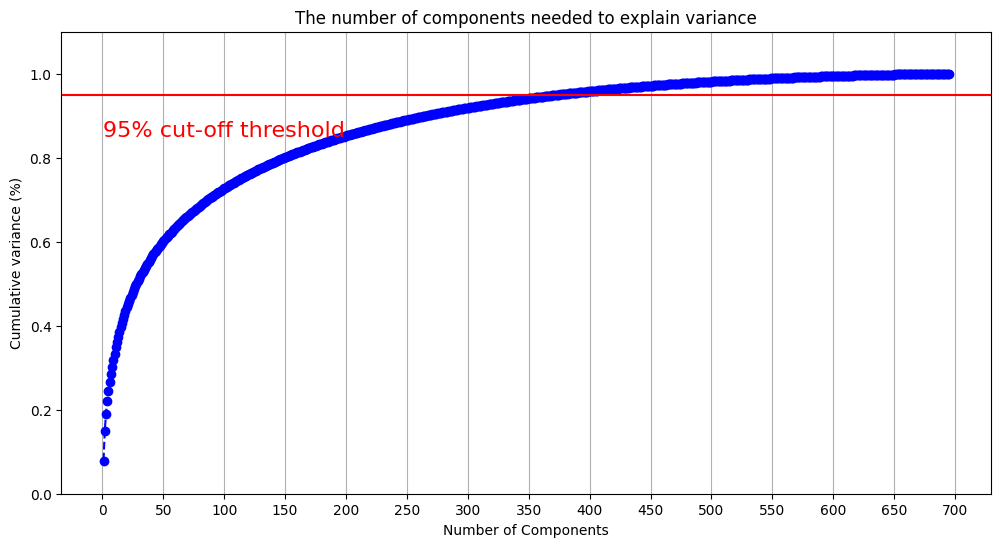

In [57]:
from sklearn.decomposition import PCA

data_rescaled = normalised_df

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 696, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 750, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## PCA Implementation

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=375)
principal_components = pca.fit_transform(data_rescaled)
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
0,-0.248551,1.609603,-1.349942,0.442749,0.435145,0.142996,-1.199759,-0.668210,0.425727,0.056439,...,0.015979,0.058329,0.024391,0.035060,-0.001334,-0.016943,0.062629,0.037385,0.080199,0.049256
1,-0.547326,1.175923,0.316855,-0.876254,0.861439,-0.373876,0.516685,-0.161439,0.115942,-0.034485,...,0.110590,-0.087254,-0.058860,-0.014403,-0.135986,0.129010,0.145337,0.072816,0.085076,0.043186
2,-0.521043,1.753079,-0.869907,-0.729940,-1.153964,0.064513,1.418011,0.707475,0.811600,-0.538229,...,-0.022158,0.092029,-0.006454,-0.082509,0.070411,0.008524,-0.138074,0.053323,-0.018681,0.019941
3,-0.647154,1.877637,-0.774309,-0.518843,-0.214291,0.246285,0.865124,1.660649,0.153537,0.358074,...,0.084644,0.124880,0.021502,-0.067662,0.055687,0.092176,0.044913,-0.107649,0.050214,0.052071
4,-0.094756,1.190555,0.522024,-1.072467,-0.311121,0.393417,-0.753010,0.776172,-1.132035,-0.666762,...,-0.028706,-0.085828,-0.105368,0.083830,0.088637,-0.018770,-0.075462,0.000282,0.014114,-0.203145


## Model

In [63]:
from sklearn.model_selection import train_test_split
X = principal_df
y = new_df['death_from_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

def hyper_tuning(name, model, model_params, X_train, y_train, X_test, y_test, cv):  
    grid_cv = GridSearchCV(model, model_params, n_jobs=-1, cv=cv)
    grid_cv_model = grid_cv.fit(X_train, y_train)
    print()
    print(name)
    print('Best Parameters: ', grid_cv_model.best_params_)
    print('Best Model Score = {}'.format(grid_cv_model.best_score_))
    #print('Train score:   ', grid_cv_model.score(X_train, y_train))
    #print('Test score:    ', grid_cv_model.score(X_test, y_test))
    print()
    return grid_cv_model
    
def model_metrics(model, X_train, y_train, X_test, y_test):   
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); 
    print();
    print('CV Mean score: ', results.mean()); 
    model.fit(X_train, y_train)
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print()
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    print()
    return results.mean(), results.std()

In [65]:
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier      
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

BOLD = '\033[1m'
END = '\033[0m'

results = []
names = []

### KNN ###

knn_params = {
    "n_neighbors" : [5,15,25,30,35,40,100],
    "weights" : ["uniform" , "distance"]
    }

knn_name = BOLD + 'K Neighbors Classifier Model:' + END
knn_model = KNeighborsClassifier()
final_model = hyper_tuning(knn_name, knn_model, knn_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(knn_name)
results.append([result_std, result_mean, result_std])

### Logistic Regression ###

lr_params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }

lr_name = BOLD + 'Logistic Regression Model:' + END
lr_model = LogisticRegression(random_state=42)
final_model = hyper_tuning(lr_name, lr_model, lr_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(lr_name)
results.append([result_std, result_mean, result_std])

### Random Forest Classifier ###

rf_params = {
    #'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_features':[2, 3, 5, 7, 8],
    #'max_depth': [1, 2, 3, 4, 5, 8],
    }

rf_name = BOLD + 'Random Forest Classifier Model:' + END
rf_model = RandomForestClassifier(n_estimators=100)
final_model = hyper_tuning(rf_name, rf_model, rf_params, X_train, y_train, X_test, y_test,5)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(rf_name)
results.append([result_std, result_mean, result_std])

### Decision Tree Classifier ###

dt_params = {
    'max_depth': [1, 2, 3, 4, 5, 8],
    }

dt_name = BOLD + 'Decision Tree Classifier Model:' + END
dt_model = DecisionTreeClassifier(random_state=42)
final_model = hyper_tuning(dt_name, dt_model, dt_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(dt_name)
results.append([result_std, result_mean, result_std])

### Extra Tree Classifier ###

et_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 2, 3, 4, 5, 8],
    }

et_name = BOLD + 'Extra Trees Classifier Model:' + END
et_model = ExtraTreesClassifier(random_state=42)
final_model = hyper_tuning(et_name, et_model, et_params, X_train, y_train, X_test, y_test,5)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(et_name)
results.append([result_std, result_mean, result_std])


### AdaBoost Classifier ###

ada_params = {
    'n_estimators': [10, 50, 100],
    #'max_depth': [1, 2, 3, 4, 5, 8],
    'learning_rate' : [0.25, 0.50]
    }

ada_name = BOLD + 'AdaBoost Classifier Model:' + END
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),random_state=42)
final_model = hyper_tuning(ada_name, ada_model, ada_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(ada_name)
results.append([result_std, result_mean, result_std])


K Neighbors Classifier Model:
Best Parameters:  {'n_neighbors': 35, 'weights': 'distance'}
Best Model Score = 0.6644702306948473

CV scores:  [0.64262295 0.71803279 0.63934426 0.64144737 0.69078947]
CV Standard Deviation:  0.03218936073453208

CV Mean score:  0.6664473684210527
Train score:    1.0
Test score:     0.7322834645669292

Confusion Matrix: 
[[ 69  26  22]
 [ 25  49  14]
 [  3  12 161]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.71      0.59      0.64       117
           1       0.56      0.56      0.56        88
           2       0.82      0.91      0.86       176

    accuracy                           0.73       381
   macro avg       0.70      0.69      0.69       381
weighted avg       0.73      0.73      0.73       381




c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ragha\AppData\Local\Programs\P


Logistic Regression Model:
Best Parameters:  {'C': 0.040370172585965536, 'penalty': 'l2'}
Best Model Score = 0.806945020030391



c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ragha\AppData\Local\Programs\P

CV scores:  [0.82622951 0.79344262 0.84590164 0.79934211 0.77960526]
CV Standard Deviation:  0.023907733237685462

CV Mean score:  0.8089042277825712


c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ragha\AppData\Local\Programs\P

Train score:    0.8778726198292843
Test score:     0.8713910761154856

Confusion Matrix: 
[[ 99  18   0]
 [ 31  57   0]
 [  0   0 176]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       117
           1       0.76      0.65      0.70        88
           2       1.00      1.00      1.00       176

    accuracy                           0.87       381
   macro avg       0.84      0.83      0.83       381
weighted avg       0.87      0.87      0.87       381



Random Forest Classifier Model:
Best Parameters:  {'max_features': 8}
Best Model Score = 0.587648835202761

CV scores:  [0.56721311 0.57704918 0.56721311 0.5625     0.5625    ]
CV Standard Deviation:  0.005313031041166315

CV Mean score:  0.5672950819672131
Train score:    1.0
Test score:     0.6430446194225722

Confusion Matrix: 
[[ 66   8  43]
 [ 34  17  37]
 [ 12   2 162]]

Classification Report:  
              precision    recall  f1-score   supp

c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Train score:    1.0
Test score:     0.6640419947506562

Confusion Matrix: 
[[ 70  29  18]
 [ 34  45   9]
 [ 18  20 138]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       117
           1       0.48      0.51      0.49        88
           2       0.84      0.78      0.81       176

    accuracy                           0.66       381
   macro avg       0.63      0.63      0.63       381
weighted avg       0.67      0.66      0.67       381




## Final Scores

In [66]:
names = ['KNN', 'Logistic', 'Random Forest', 'Decision Tree', 'Extra Trees', 'AdaBoost']

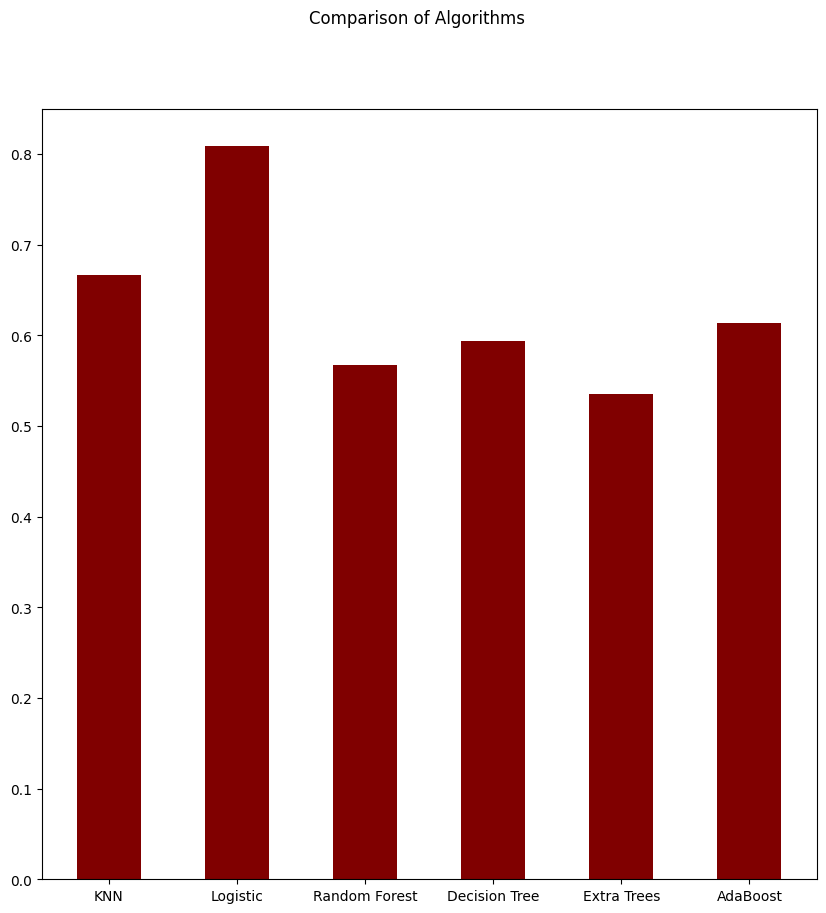

In [67]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of Algorithms')
new_results = []
for i in range(len(results)):
    new_results.append(results[i][1])
plt.bar(names, new_results, color ='maroon',
        width = 0.5)
plt.show()